# Q-Learning with FrozenLake                                                                  
<br> 
In this Notebook, I'll implement an agent <b>that plays FrozenLake.</b>
<img src="frozenlake.png" alt="Frozen Lake"/>

The goal of this game is <b>to go from the starting state to the goal state</b> by walking only on frozen tiles and avoid holes .<br>However, the ice is slippery, <b>so you won't always move in the direction you intend (stochastic environment).</b>

## Installation

To install the base Gymnasium library, use `pip install gymnasium`

This does not include dependencies for all families of environments (there's a massive number, and some can be problematic to install on certain systems). You can install these dependencies for one family like `pip install gym[atari]` or use `pip install gym[all]` to install all dependencies.

## Step 0: Import the dependencies 📚
We use 4 libraries:
- `Gymnasium` for our FrozenLake Environment
- `Numpy` for handling arrays and our Qtable
- `MatplotLib.pyplot` to plot graphs and visualize the leaning progress
- `Pickle` for saving and loading Q-table to/from a file

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Step 1: Create the environment 🎮
- Here I'll create the FrozenLake environment. 
- Gymnasium is the library <b> composed of many environments that I will use to train my agent.</b>
- In our case I choose to use Frozen Lake.

## Step 2: Create the Q-table and initialize it 🗄️
- Now, I'll create my Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- Gymnasium provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

## Step 3: Create the hyperparameters ⚙️
- Here, I'll specify the hyperparameters

## Step 4: The Q learning algorithm 🧠
- Now I implement the Q learning algorithm:
<img src="qtable_algo.png" alt="Q algo"/>

## Visualization: Use my Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

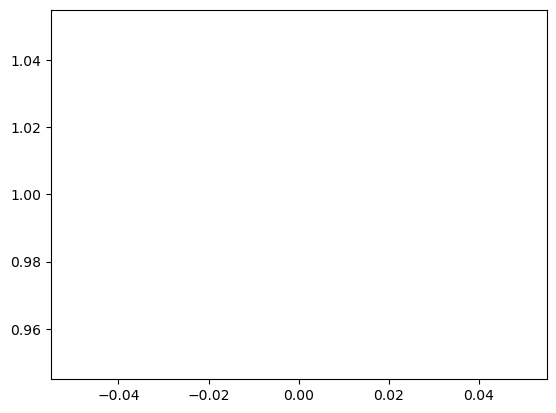

In [10]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('frozen_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake8x8.png')

    if is_training:
        f = open("frozen_lake8x8.pkl","wb")
        pickle.dump(q, f)
        f.close()

if __name__ == '__main__':
    run(15000)

    #run(1, is_training=False, render=True)